In [2]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/등산로_군집분류1.csv",engine='python')

In [20]:
df = df.dropna()

In [9]:
df.head(10)

,산코드_번호,구간_일련번호,구간_거리,구간_상행시간,구간_하행시간,속력,구간_난이도,시작_표고값,끝_표고값,표고 차,경사도,산 위치,산 명,군집분류
0,2.107111e+09,2.107110e+13,1313.0,25.0,18.0,61.069767,3.0,242.0,360.0,118.0,8.987053,경기도 광주시 오포읍,문형산,1.0
1,2.130023e+09,2.130020e+13,312.0,6.0,4.0,62.400000,3.0,233.0,205.0,28.0,8.974359,경기도 양평군 강하면,양자산,1.0
2,2.133991e+09,2.133990e+13,110.0,2.0,1.0,73.333333,3.0,37.0,43.0,6.0,5.454545,경기도 화성시 동탄면,마등산,1.0
3,2.130023e+09,2.130020e+13,1194.0,23.0,16.0,61.230769,3.0,340.0,233.0,107.0,8.961474,경기도 양평군 강하면,양자산,1.0
4,2.133991e+09,2.133990e+13,109.0,2.0,1.0,72.666667,3.0,127.0,125.0,2.0,1.834862,경기도 화성시 동탄면,마등산,1.0
5,2.115100e+09,2.115100e+13,108.0,2.0,1.0,72.000000,3.0,50.0,57.0,7.0,6.481481,경기도 부천시원미구 원미2동,원미산,2.0
6,2.133991e+09,2.133990e+13,180.0,3.0,2.0,72.000000,3.0,42.0,51.0,9.0,5.000000,경기도 화성시 동탄면,마등산,1.0
7,2.141180e+09,2.141180e+13,180.0,3.0,2.0,72.000000,3.0,113.0,118.0,5.0,2.777778,경기도 안성시 죽산면,백운산,1.0
8,2.101024e+09,2.101020e+13,178.0,3.0,2.0,71.200000,3.0,1420.0,1433.0,13.0,7.303371,경기도 가평군 북면,화악산,1.0
9,2.141180e+09,2.141180e+13,176.0,3.0,2.0,70.400000,3.0,166.0,173.0,7.0,3.977273,경기도 안성시 죽산면,백운산,1.0


In [10]:
import matplotlib.pyplot as plt

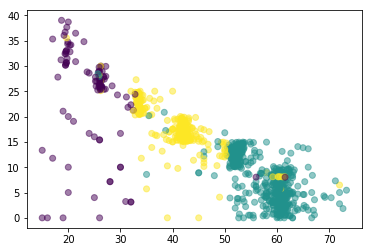

In [12]:
plt.scatter(df.속력,df.경사도,c=df.군집분류,alpha=0.5)

In [21]:
df = df[df.경사도<=8]

In [15]:
df.to_csv("8도이하 군집분류.csv",index=False)

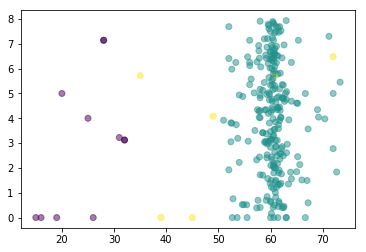

In [16]:
plt.scatter(df.속력,df.경사도,c=df.군집분류,alpha=0.5)

In [1]:
import pandas as pd
import numpy as np

In [59]:
train = pd.read_csv("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/final mountain2.csv",engine='python')

In [60]:
bf = pd.read_csv("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/무장애길.csv",engine='python')

In [61]:
from sklearn.cluster import KMeans

In [62]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(train[['속력','경사도']])
predict = pd.DataFrame(model.predict(train[['속력','경사도']]))
predict.columns = ['predict']
r = pd.concat([train[['속력','경사도']],predict],axis=1)

In [63]:
import matplotlib.pyplot as plt

In [65]:
r.predict[r.predict==1.0]='느림'
r.predict[r.predict==0.0]='보통'
r.predict[r.predict==2.0]='빠름'

C:\Users\user\AppData\Local\conda\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
r.predict[r.predict=='느림']=0.0
r.predict[r.predict=='보통']=2.0
r.predict[r.predict=='빠름']=1.0

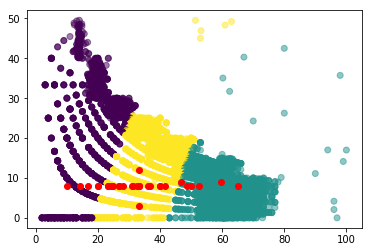

In [67]:
plt.scatter(r.속력, r.경사도, c=r.predict, alpha= 0.5)
plt.scatter(bf.속력, bf.경사, c='r')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

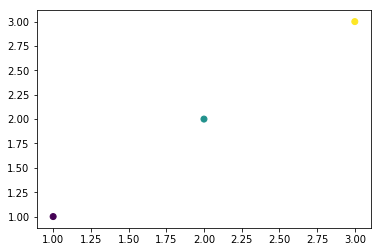

In [2]:
x = pd.Series([1,2,3])
y = pd.Series([1,2,3])
z = pd.Series([0,1,2])

plt.scatter(x,y,c=z)

In [22]:
df.columns

Index(['산코드_번호', '구간_일련번호', '구간_거리', '구간_상행시간', '구간_하행시간', '속력', '구간_난이도',
       '시작_표고값', '끝_표고값', '표고 차', '경사도', '산 위치', '산 명', '군집분류'],
      dtype='object')

In [25]:
df['산 위치']

2          경기도 화성시 동탄면 
4          경기도 화성시 동탄면 
5      경기도 부천시원미구 원미2동 
6          경기도 화성시 동탄면 
7          경기도 안성시 죽산면 
8           경기도 가평군 북면 
9          경기도 안성시 죽산면 
10         경기도 양평군 강하면 
11         경기도 화성시 동탄면 
13     경기도 부천시원미구 원미2동 
14        경기도 동두천시 소요동 
16         경기도 광주시 오포읍 
18         경기도 안산시 월피동 
19         경기도 안성시 죽산면 
22     경기도 부천시원미구 원미2동 
23        경기도 동두천시 소요동 
25     경기도 부천시원미구 원미2동 
26          경기도 가평군 북면 
27         경기도 화성시 동탄면 
30     경기도 부천시원미구 원미2동 
31            경기도 시흥시  
35          경기도 가평군 북면 
36         경기도 광주시 오포읍 
37         경기도 화성시 동탄면 
38         경기도 광주시 초월면 
39            경기도 가평군  
40         경기도 안산시 월피동 
42         경기도 양평군 지제면 
44            경기도 시흥시  
45         경기도 평택시 청북면 
             ...       
330        경기도 광주시 도척면 
332        경기도 광주시 초월면 
335        경기도 가평군 가평읍 
343        경기도 가평군 가평읍 
345        경기도 광주시 도척면 
365        경기도 시흥시 물왕동 
378    경기도 부천시원미구 원미2동 
384        경기도 가평군 외서면 
385       경기도 남양주시 화도읍 
399        경기도 안성시 원곡면 
400        경기도 안

In [31]:
df = df.reset_index()

In [32]:
df.head()

,index,산코드_번호,구간_일련번호,구간_거리,구간_상행시간,구간_하행시간,속력,구간_난이도,시작_표고값,끝_표고값,표고 차,경사도,산 위치,산 명,군집분류
0,2,2.133991e+09,2.133990e+13,110.0,2.0,1.0,73.333333,3.0,37.0,43.0,6.0,5.454545,경기도 화성시 동탄면,마등산,1.0
1,4,2.133991e+09,2.133990e+13,109.0,2.0,1.0,72.666667,3.0,127.0,125.0,2.0,1.834862,경기도 화성시 동탄면,마등산,1.0
2,5,2.115100e+09,2.115100e+13,108.0,2.0,1.0,72.000000,3.0,50.0,57.0,7.0,6.481481,경기도 부천시원미구 원미2동,원미산,2.0
3,6,2.133991e+09,2.133990e+13,180.0,3.0,2.0,72.000000,3.0,42.0,51.0,9.0,5.000000,경기도 화성시 동탄면,마등산,1.0
4,7,2.141180e+09,2.141180e+13,180.0,3.0,2.0,72.000000,3.0,113.0,118.0,5.0,2.777778,경기도 안성시 죽산면,백운산,1.0


In [33]:
city = []

for i in range(len(df['산 위치'])):
    a = df['산 위치'][i].split()
    city.append(a[1])

In [34]:
city

['화성시',
 '화성시',
 '부천시원미구',
 '화성시',
 '안성시',
 '가평군',
 '안성시',
 '양평군',
 '화성시',
 '부천시원미구',
 '동두천시',
 '광주시',
 '안산시',
 '안성시',
 '부천시원미구',
 '동두천시',
 '부천시원미구',
 '가평군',
 '화성시',
 '부천시원미구',
 '시흥시',
 '가평군',
 '광주시',
 '화성시',
 '광주시',
 '가평군',
 '안산시',
 '양평군',
 '시흥시',
 '평택시',
 '가평군',
 '시흥시',
 '광주시',
 '부천시원미구',
 '광주시',
 '안성시',
 '시흥시',
 '의왕시',
 '부천시원미구',
 '동두천시',
 '화성시',
 '안성시',
 '시흥시',
 '화성시',
 '화성시',
 '가평군',
 '가평군',
 '광주시',
 '동두천시',
 '평택시',
 '부천시원미구',
 '부천시원미구',
 '양평군',
 '광주시',
 '양평군',
 '가평군',
 '안성시',
 '안산시',
 '안성시',
 '가평군',
 '가평군',
 '부천시원미구',
 '가평군',
 '여주시',
 '양평군',
 '광주시',
 '안성시',
 '안성시',
 '여주시',
 '동두천시',
 '광주시',
 '포천시',
 '안성시',
 '양평군',
 '부천시원미구',
 '동두천시',
 '시흥시',
 '가평군',
 '광주시',
 '양평군',
 '가평군',
 '시흥시',
 '광주시',
 '가평군',
 '광주시',
 '부천시원미구',
 '가평군',
 '가평군',
 '광주시',
 '가평군',
 '남양주시',
 '양평군',
 '가평군',
 '가평군',
 '화성시',
 '가평군',
 '광주시',
 '화성시',
 '화성시',
 '가평군',
 '시흥시',
 '동두천시',
 '가평군',
 '양평군',
 '동두천시',
 '가평군',
 '안산시',
 '광주시',
 '여주시',
 '안성시',
 '동두천시',
 '화성시',
 '광주시',
 '동두천시',
 '화성시',
 '가평군',
 '안산시',
 '가평군',
 '안산시',
 

In [35]:
data = pd.DataFrame({'city':city,'cate':df.군집분류})

In [38]:
data.cate[data.cate==0.0]='느림'
data.cate[data.cate==1.0]='빠름'
data.cate[data.cate==2.0]='중간'


C:\Users\user\AppData\Local\conda\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
data.cate[data.cate=='느림']=0
data.cate[data.cate=='빠름']=2
data.cate[data.cate=='중간']=1


In [55]:
new_data = pd.crosstab(data.city, data.cate)

In [57]:
new_data.columns=['느림','보통','빠름']

In [58]:
new_data

,느림,보통,빠름
city,,,
가평군,3,0,56
광주시,1,0,37
남양주시,0,0,2
동두천시,2,0,14
부천시원미구,0,2,22
시흥시,0,0,14
안산시,0,0,9
안성시,0,1,30
양평군,0,0,16
